In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C:/Users/leejo/Downloads/archive (13)/SalesForCourse_quizz_table.csv")
df

In [12]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [13]:
df.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [14]:
df['Customer Age'].unique()

array([29., 18., 19., 20., 22., 24., 40., 21., 23., 25., 30., 55., 53.,
       52., 51., 50., 49., 48., 47., 46., 45., 41., 42., 65., 64., 32.,
       33., 63., 34., 35., 43., 62., 37., 44., 60., 59., 58., 36., 61.,
       57., 54., 38., 39., 27., 28., 17., 26., 67., 66., 71., 31., 56.,
       87., 70., 69., 73., 68., 75., 86., 85., 77., 81., 84., 78., 72.,
       80., 74., 76., 79., 82., nan])

In [15]:
# Define age groups
age_groups = {(0, 18): "0-18",(19, 30): "19-30",(31, 40): "31-40",(41, 50): "41-50",(51, 60): "51-60",(61, 70): "61-70",(71, float("inf")): "71 & above"}

# Create a new column for age groups
df['Age Group'] = df['Customer Age'].apply(lambda x: next((v for k, v in age_groups.items() if k[0] <= x <= k[1]), None))

In [16]:
df_avg = df.groupby("Age Group").agg({"Unit Price":"mean", "Quantity":"mean"}).reset_index()
df_avg

,Age Group,Unit Price,Quantity
0,0-18,272.800743,2.002475
1,19-30,364.846068,1.999819
2,31-40,417.723274,1.990667
3,41-50,403.140824,2.028640
4,51-60,384.655071,1.997979
5,61-70,338.412518,1.997155
6,71 & above,288.079208,1.871287


In [24]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

C:\Users\leejo\AppData\Local\Temp\ipykernel_11340\340415700.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = group_df.pivot("Age Group", "Product Category")


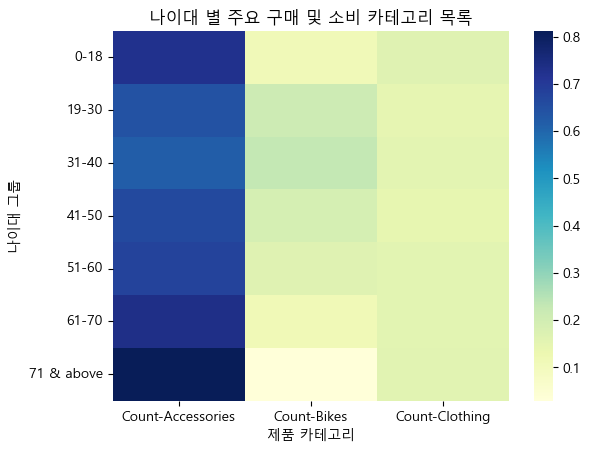

In [30]:
group_df = df.groupby("Age Group")["Product Category"].value_counts(normalize=True).rename("Count").to_frame().reset_index()

pivot_df = group_df.pivot("Age Group", "Product Category")

sns.heatmap(pivot_df, annot=False, cmap="YlGnBu", cbar=True);
plt.xlabel("제품 카테고리")
plt.ylabel("나이대 그룹")
plt.title("나이대 별 주요 구매 및 소비 카테고리 목록");

### 분석 기법(상관관계 분석, 인과관계 분석, 단순회귀분석, 로지스틱 회귀분석 등 )
##### 0) 총매출액과 높은 연관성을 지닌 고객 행태변수 찾기(상관관계 분석 - 피어슨 상관관계 분석)
-> Unit Cost, Unit Price, Cost
##### 1) 나이, 성별, 월에 따른 세부 구매 카테고리 차이

##### 2) 국가별 총매출액 차이와 주요 소비 카테고리

##### 3) 방문빈도와 거래기간, 가정 내 아이 유무 등은 이탈에 영향을 줄 것인가(선형판별분석 - 분류예측분석 기법 가운데 하나)

##### 4) 거주지역이 오프라인 매장, or 상품 단지와의 거리와 멀다면, 고객은 불편함을 느끼고 서비스 사용을 중단할 것인가?(이탈)

등등..

In [31]:
from scipy import stats
corr = df.corr(method = 'pearson')
corr

C:\Users\leejo\AppData\Local\Temp\ipykernel_11340\1332633183.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083338,-0.145997
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892
Revenue,-0.083338,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


In [34]:
df_pear = df[['Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Customer Age']]
df_pear

,Unit Cost,Unit Price,Cost,Revenue,Customer Age
0,80.00,109.000000,80.0,109.000000,29.0
1,24.50,28.500000,49.0,57.000000,29.0
2,3.67,5.000000,11.0,15.000000,29.0
3,87.50,116.500000,175.0,233.000000,29.0
4,35.00,41.666667,105.0,125.000000,29.0
...,...,...,...,...,...
34862,1160.00,985.500000,2320.0,1971.000000,38.0
34863,2049.00,1583.000000,2049.0,1583.000000,38.0
34864,683.00,560.666667,2049.0,1682.000000,38.0
34865,2320.00,1568.000000,2320.0,1568.000000,38.0


In [55]:
df_pear['Customer Age'].fillna(int(df_pear['Customer Age'].mean()), inplace = True)

df_pear.drop(34866, inplace = True)

C:\Users\leejo\AppData\Local\Temp\ipykernel_11340\2114104604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pear['Customer Age'].fillna(int(df_pear['Customer Age'].mean()), inplace = True)
C:\Users\leejo\AppData\Local\Temp\ipykernel_11340\2114104604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pear.drop(34866, inplace = True)


In [56]:
df_pear

,Unit Cost,Unit Price,Cost,Revenue,Customer Age
0,80.00,109.000000,80.0,109.0,29.0
1,24.50,28.500000,49.0,57.0,29.0
2,3.67,5.000000,11.0,15.0,29.0
3,87.50,116.500000,175.0,233.0,29.0
4,35.00,41.666667,105.0,125.0,29.0
...,...,...,...,...,...
34861,2049.00,1487.000000,2049.0,1487.0,38.0
34862,1160.00,985.500000,2320.0,1971.0,38.0
34863,2049.00,1583.000000,2049.0,1583.0,38.0
34864,683.00,560.666667,2049.0,1682.0,38.0


In [74]:
print(stats.pearsonr(df_pear['Customer Age'], df_pear['Revenue']))
print(stats.pearsonr(df_pear['Unit Cost'], df_pear['Revenue']))
print(stats.pearsonr(df_pear['Unit Price'], df_pear['Revenue']))
print(stats.pearsonr(df_pear['Cost'], df_pear['Revenue']))
print(stats.pearsonr(df_pear['Unit Cost'], df_pear['Unit Price']))

PearsonRResult(statistic=0.02483640887753055, pvalue=3.5160529970746246e-06)
PearsonRResult(statistic=0.8369569003494289, pvalue=0.0)
PearsonRResult(statistic=0.8510338420210892, pvalue=0.0)
PearsonRResult(statistic=0.9791191283085061, pvalue=0.0)
PearsonRResult(statistic=0.9810325127553665, pvalue=0.0)


### 상관관계 분석 결과: 

##### Customer Age 와 Revenue간의 상관관계는 0.02~.. 수준으로 굉장히 낮지만, 'Unit Cost', 'Unit Price', 'Cost'는 'Revenue' 즉, 총 매출액과 1에 가까운 상관계수의 결과값이 도출되었다. 두 변수 간의 상관계수가 높다는 건?

> 1) 이는 'Unit Cost', 'Unit Price', 'Cost'가 'Revenue'와 밀접하게 연관되어 있으며, 이들 중 하나의 값이 변할 때 매출액에 큰 영향을 미친다는 것을 시사한다. 이 관계는 선형적이므로 하나의 변수가 다른 변수에 대해 어떻게 변하는지를 일정한 비율로 설명할 수 있다.<br>

> 2) 두 변수 간에 원인과 결과 관계가 있을 수 있다.

> 3) 예측 가능성이 높다: 두 변수 간의 강한 선형 관계는 하나의 변수의 값을 알면 다른 변수의 값을 비교적 정확하게 예측할 수 있다는 것을 의미. 추후 모델링에서도 유용하게 사용될 듯

> 4) 상호 의존성이 강할 수 있다: 두 변수 간의 강한 상관계수는 상호 의존성이 크다는 것을 나타낼 수 있음. 한 변수가 변할 때 다른 변수도 그에 따라 변할 가능성이 크다. 

### 'Unit Cost': 상품 단가(생산자 관점)
1) 비용 및 수익의 직접적인 의존성: 'Unit Cost'는 제품 또는 서비스를 제공하는 데 발생하는 비용을 나타내며, 'Revenue'는 해당 제품 또는 서비스의 매출액을 나타냄. 일반적으로 비용이 증가하면 수익도 증가하고, 반대로 비용이 감소하면 수익도 감소할 수 있음.<br>
2) 고정 비용 및 가변 비용: 비즈니스 모델에 따라 일정 부분의 비용이 고정되어 있을 수 있음. 고정 비용이 일정하게 유지되는 동안 판매량이 증가하면 'Unit Cost'는 감소하고, 이로 인해 'Revenue'는 증가할 것.<br>
3) 가격 결정과의 관련성: 'Unit Cost'와 'Revenue' 간의 선형 관계는 종종 제품이나 서비스의 가격이 'Unit Cost'를 기반으로 결정되기 때문일 수 있음. 즉, 가격을 높게 책정하면 'Unit Cost'와 'Revenue'가 양의 선형 관계를 가질 있는 것.<br>
4) 비즈니스 프로세스의 단순성: 종종 비즈니스 모델이나 프로세스가 단순하면서도 효율적일수록 'Unit Cost'와 'Revenue'는 선형적인 경향을 보일 가능성이 높음. (해당 데이터의 특성일 가능성이 높음)

### 'Unit Price': 상품 가격(소비자 관점)
일반적으로 'Unit Price'와 'Revenue'는 양의 선형 관계를 가짐. 즉, 제품이나 서비스의 가격이 상승하면 매출액도 증가하고, 가격이 하락하면 매출액도 감소하는 경향이 있기 때문. 이는 가격이 증가하면 각 판매 단위에 대한 수익이 증가하는 형태에 기인함. 
 > 다만, 이 관계가 항상 그런 것은 아님. 가격이 높아지면 판매량이 감소할 수 있고, 가격이 낮아지면 판매량이 증가할 수 있음. 이러한 상황에서는 'Unit Price'와 'Revenue' 간의 관계가 선형적이라고 보기 어려우나, 해당 데이터에선 선형적인 관계가 나타남을 알 수 있다.
또한, 시장 상황, 경쟁 상황, 소비자의 가격 탄력성 등 여러 요인이 이 관계를 영향을 미치므로, 실제로는 더 복잡한 상황이 될 수 있음을 유의할 것. 

### (단위 가격, 단가, 가격) ~ 총매출액 간 인과관계 분석 

In [58]:
import statsmodels.formula.api as smf

In [63]:
df.rename(columns = {'Unit Price' : 'Unit_Price'}, inplace = True)
df.rename(columns = {'Unit Cost' : 'Unit_Cost'}, inplace  = True)
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit_Cost,Unit_Price,Cost,Revenue,Column1,Age Group
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN,19-30
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN,19-30
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN,19-30
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN,19-30
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN,31-40
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN,31-40
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN,31-40
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN,31-40


In [75]:
# Unit_Cost 를 독립변수, 'Revenue'를 종속변수
model1 = smf.ols(formula = 'Unit_Cost ~ Revenue', data = df).fit()
# Unit_Price 를 독립변수, 'Revenue'를 종속변수
model2 = smf.ols(formula = 'Unit_Price ~ Revenue', data = df).fit()
# Cost를 독립변수, 'Revenue'를 종속변수
model3 = smf.ols(formula = 'Cost ~ Revenue', data = df).fit()
# Unit Cost를 독립변수 Unit Price를 종속벼수 
model4 = smf.ols(formula = 'Unit_Cost ~ Unit_Price', data = df).fit()

In [72]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Unit_Cost   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                 8.154e+04
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:39   Log-Likelihood:            -2.4443e+05
No. Observations:               34866   AIC:                         4.889e+05
Df Residuals:                   34864   BIC:                         4.889e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9168      1.904     -3.633      0.000     -10.648      -3.186
Revenue        0.5567      0.002    285.556      0.000       0.553       0.561
==============================================================================
Omnibus:                    11846.600   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76543.404
Skew:                           1.484   Prob(JB):                         0.00
Kurtosis:                       9.624   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unit_Price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 9.157e+04
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:42   Log-Likelihood:            -2.4541e+05
No. Observations:               34866   AIC:                         4.908e+05
Df Residuals:                   34864   BIC:                         4.908e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2962      1.958      0.151      0.880      -3.542       4.134
Revenue        0.6069      0.002    302.611      0.000       0.603       0.611
==============================================================================
Omnibus:                     8525.868   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36476.353
Skew:                           1.146   Prob(JB):                         0.00
Kurtosis:                       7.456   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 8.088e+05
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:30:19   Log-Likelihood:            -2.2186e+05
No. Observations:               34866   AIC:                         4.437e+05
Df Residuals:                   34864   BIC:                         4.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1723      0.996    -12.216      0.000     -14.125     -10.219
Revenue        0.9178      0.001    899.319      0.000       0.916       0.920
==============================================================================
Omnibus:                     7222.758   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122678.856
Skew:                           0.536   Prob(JB):                         0.00
Kurtosis:                      12.127   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Unit_Cost   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 8.930e+05
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:40:06   Log-Likelihood:            -2.0824e+05
No. Observations:               34866   AIC:                         4.165e+05
Df Residuals:                   34864   BIC:                         4.165e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3075      0.633     -9.962      0.000      -7.549      -5.067
Unit_Price     0.9151      0.001    944.977      0.000       0.913       0.917
==============================================================================
Omnibus:                    10749.504   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           590441.114
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                      23.113   Cond. No.                         814.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  도출된 결론(R^2, 결정계수 값을 통해 알 수 있음.)
1) unit cost - revenue, unit price - revenue 간 인과관계가 0.700, 0.724 수준으로 다소 부족함을 알 수 있다. 타 통계분석 기법을 적용해 원인 및 배제 가능 요소를 알아보자. 
2) unit cost - unit price, cost - revenue 간 인과관계는 0.959, 0.962 수준으로 매우 높음을 알 수 있다. 

### 나중에 해볼 목록들 
1) 단순회귀분석(cost - revenue)
2) 다중회귀분석(unit price, unit cost - revenue)
3) 

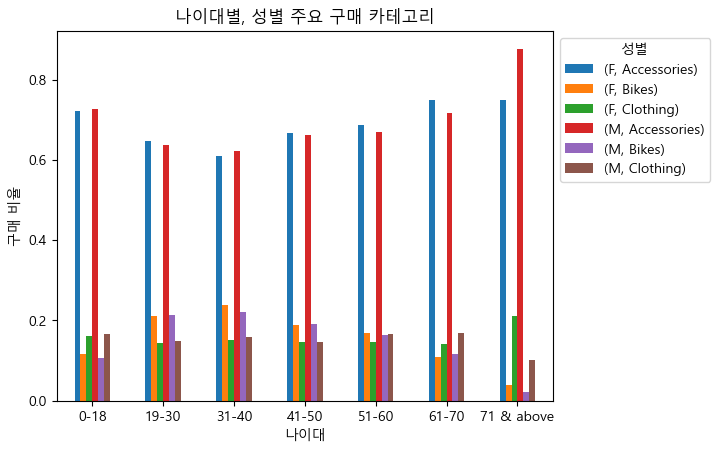

<Figure size 1000x800 with 0 Axes>

In [26]:
# 나이대별 여성과 남성의 주요 소비 상품 목록
df_group = df.groupby(["Age Group", "Customer Gender"])["Product Category"].value_counts(normalize=True).rename("Count").to_frame().reset_index()

pivot_df = df_group.pivot_table(index="Age Group", columns=["Customer Gender", "Product Category"], values="Count")
    
pivot_df.plot(kind='bar', rot=0)

plt.xlabel('나이대')
plt.ylabel('구매 비율')
plt.title('나이대별, 성별 주요 구매 카테고리')

plt.legend(title='성별', bbox_to_anchor=(1, 1))

plt.figure(figsize=(10, 8));